In [44]:
import os
from PIL import Image
import albumentations as A
import cv2
from albumentations.pytorch import ToTensorV2

In [2]:
path = 'finished/train/dataraw/hires'

In [3]:
img_path = path+'/'+os.listdir(path)[0]

In [20]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = Image.open(img_path)

In [5]:
hr_size = 96
lr_size = hr_size//4

In [58]:
train = False

In [61]:
initial_transform = A.Compose(
    [
        A.RandomCrop(hr_size, hr_size),
        A.HorizontalFlip(p=0.5) if train else None,
        A.RandomRotate90(p=0.5) if train else None
    ]
)

In [45]:
hr_transform = A.Compose(
    [
        A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
        ToTensorV2()
    ]
)

In [46]:
lr_transform = A.Compose(
    [
        A.Resize(lr_size, lr_size),
        A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        ToTensorV2()
    ]
)

In [27]:
initial_transform(image=image)['image']

array([[[ 50,  59,  32],
        [ 74,  83,  56],
        [ 91, 100,  71],
        ...,
        [ 20,  27,  20],
        [ 10,  17,  10],
        [ 12,  19,  12]],

       [[ 45,  55,  31],
        [ 50,  60,  36],
        [ 68,  78,  53],
        ...,
        [ 22,  29,  22],
        [ 24,  31,  24],
        [ 13,  19,  15]],

       [[ 54,  66,  44],
        [ 69,  81,  59],
        [ 56,  68,  46],
        ...,
        [ 22,  29,  21],
        [ 18,  24,  20],
        [  9,  15,  11]],

       ...,

       [[167, 180, 126],
        [156, 169, 115],
        [159, 172, 118],
        ...,
        [146, 159, 106],
        [159, 172, 119],
        [180, 193, 140]],

       [[162, 175, 119],
        [146, 159, 103],
        [172, 185, 129],
        ...,
        [158, 171, 118],
        [167, 180, 127],
        [178, 190, 140]],

       [[162, 175, 119],
        [170, 184, 125],
        [173, 187, 128],
        ...,
        [179, 191, 141],
        [189, 201, 151],
        [190, 202, 154]]

In [12]:
import matplotlib.pyplot as plt

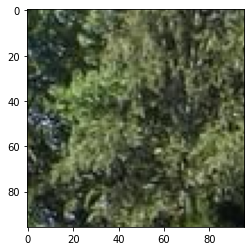

In [70]:
plt.imshow(initial_transform(image=image)['image'])